### ppt에 내용 잘 읽기

https://yhyun225.tistory.com/16




https://hyjykelly.tistory.com/44

### 훈련데이터 ( w, b 값에 관여하는 데이터)




### 검증데이터(테스트데이터로 사용하기도 함)
 - 훈련데이터의 w,b 값이 잘 되어 있는지 확인하는 데이터셋





### 고전적인 머신러닝은 이미 공식이 만들어져 있기 때문에 검증 데이터 없어도 됨
   - 이미 만들어진 공식은 변경이 불가능
   - (훈련데이터를 이용해서 w,b,만 fit(계산))
   - 그리고 이 w,b 값이 좋은 값인지 테스트 데이터로 확인만(오차가 작은지, 일치확률)
   - => 좋은 결과이면 이 모델을 확정해서 새로운 데이터에 연동

딥러닝은 무작위로 w,b를 훈련에 넣음, 오차를 계산, 그 오차값을 0으로 만들기 위한 경사 하강(오차역전파)을 해서



 무조건 훈련데이터는 오차가 작아지게 됨, 그럼 이 w,b가 좋은 값이냐 확인용으로 검증데이터를 그때그떄 넣어서 계산하고 y값의 오차를 확인함
 - 좋은케이스 : 훈련데이터의 오차도 작아지고, 검증데이터의 오차도 점점 줄어드는 상황이 좋음
 - 중단해야하는 경우(과적합) : 훈련데이터의 오차는 작아지는데, 검증데이터의 오차는 커지는 지점




최종 작업이 다 끝나면 w,b가 생성이 된 모델이 작성되면 이 모델을 테스트 데이터에 넣어서 모델 검증(오차검증표)
 - 좋은 결과이면 이 모델 확정해서 새로운 데이터에 연동

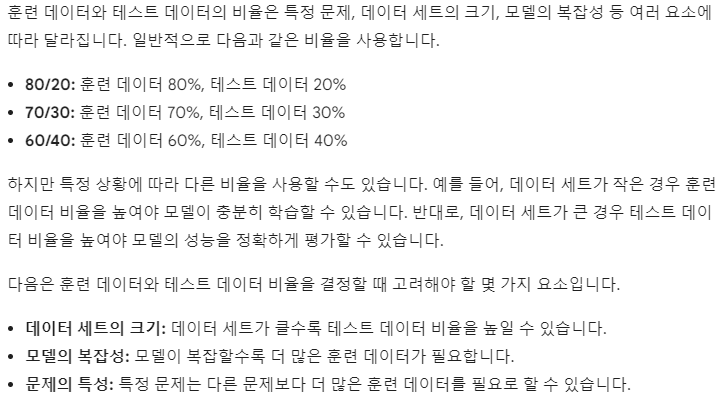

- 무작위 분할
  - 데이터를 무작위로 훈련 데이터와 테스트 데이터로 분할합니다.
- 층화 분할
  - 데이터를 각 클래스별로 동일한 비율로 분할합니다.
- 시계열 분할
  - 시간 순서대로 데이터를 분할합니다.
  

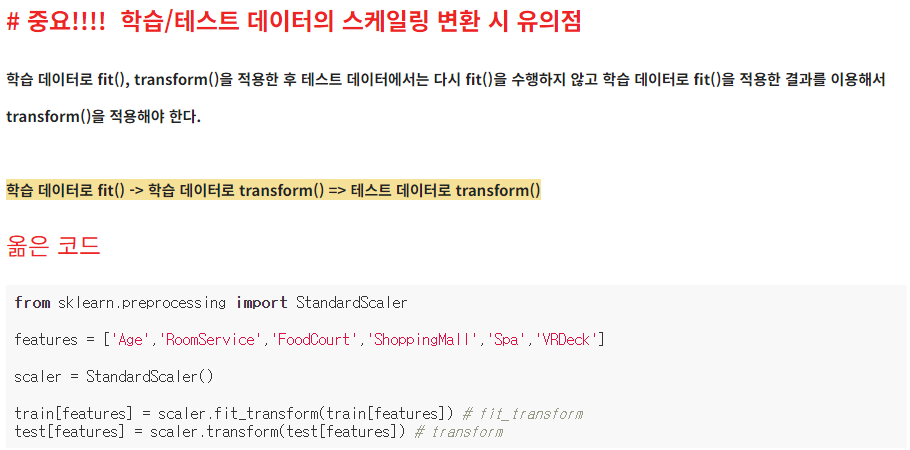

https://wikidocs.net/42596
- 타이타닉

#### <span style="color: #ffd400">오전의 중점 사항</span>
- 훈련,테스트데이터의 이해 중요( 용어중 오버피팅)
- 머신러닝이란 / 딥러닝이란 개념 이해 (위에 필기 해논거)

## <span style="color: green">오후 시작</span>

02.코드_1. 딥러닝개요.html

x값을 입력하면 레이어층에서 사용자가 지정한 활성화 함수로 계산을 진행



그 Output이 다음레이어에 in 하는 X값으로 지정이 됨



마지막 레이어까지 반복

이 작업이 끝나면 마지막 레이어에서 출력된 값과 실제값을 비교해서 오차를 계산하고




경사하강(최적화기법에 따라서) 후, 오차역전파해서(텐서에서는 보이지 않고, 파이토치에서는 보임) w,b를 갱신한다.

오차를 계산하는 단위
- 배치단위( 한개의 에포크에서 나뉘는 자료의 갯수)
- 에포크 단위




예를 들어서 한개의 훈련데이터가 300개로 구성되어 있다면, 배치 5, 에포크 20 해주세요.
5개를 읽어주세요라는 뜻. 1 에포크에 60번 오차계산함. 총 60*20=1200번의 오차 계산함 



배치를 늘리는 것도 과적합을 조절 가능

-----------

딥러닝 수학식 제공모듈(api)
- 텐서플로우(구글) 2.0 ( 케라스 고수준 API)
- 파이토치 사용자가 클래스 핸들링

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(5, 5)),
  tf.keras.layers.Dense(10, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') #softmax는 다항분류 계산식(활성화 함수) 
])                    # 0부터 9 10개라서

# 원래는 categorical_crossentropy인데
# y입력값이 원핫 인코딩이 안되어 있으면 sparse_categorical_crossentropy 라고 지정하면
# 알아서 원핫 인코딩함 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])
```

5*5= 25 + b => 26개의 파라미터



26개 가 Dense(10) -> 260개의 파라미터

10개 +b => 11개 -> Dense(10) -> 110개 파라미터 

손글씨 예측 모델을 만들었다
- 가로*세로 28*28,흑백이미지
- 배경색은 검정색
- 글씨색은 흰색
- 글씨는 정중앙에 약간의 여백

-------

전반적인 모델제작의 흐름을 이해합니다.

## 오늘의 이해
- 딥러닝 관련 용어
- 모델제작시 학습한 상황과 맞지 않으면 모델 적중율 떨어짐
- (예) 손글씨 모델,  배경색(검정색)(흰색인 경우 모델 잘 안맞음),  사이즈(28,28)(이부분 안맞으면 에러),  글자 두께,위치
- 흑백 (이 부분 안맞으면 에러, 채널수가 맞지 않으므로)
  

#### 텐서 플로우 특이사항
- y값은 3개이상의 카테고리 중 한개를 맞추는 분류는 반드시 softmax라는 확률(더해서1)이 되는 계산식을 사용해야함.
- 이 떄 원핫인코딩의 y값을 넣는 것이 원칙이나, 혹시 y값을 원핫 인코딩 하지 않았다면 loss에서 원핫인코딩시킬 수 있음.
- 단 predict 에서 tf.nn.softmax() 해야함. 